In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import load
from tensorflow import keras
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import classification_report, matthews_corrcoef,confusion_matrix, ConfusionMatrixDisplay, auc, roc_auc_score, roc_curve, RocCurveDisplay

## Logistic Regression

In [3]:
model = load("../models/logreg.joblib")
test_data = load("../data/test data/logreg_test_data.joblib")

In [4]:
label_predictions = model.predict(test_data["features"])

Classification report

In [5]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

         0.0       0.58      0.46      0.51      5667
         1.0       0.62      0.73      0.67      6939

    accuracy                           0.61     12606
   macro avg       0.60      0.59      0.59     12606
weighted avg       0.60      0.61      0.60     12606



Matthews correlation coeficient

In [6]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.19365573110629725

Confusion matrix

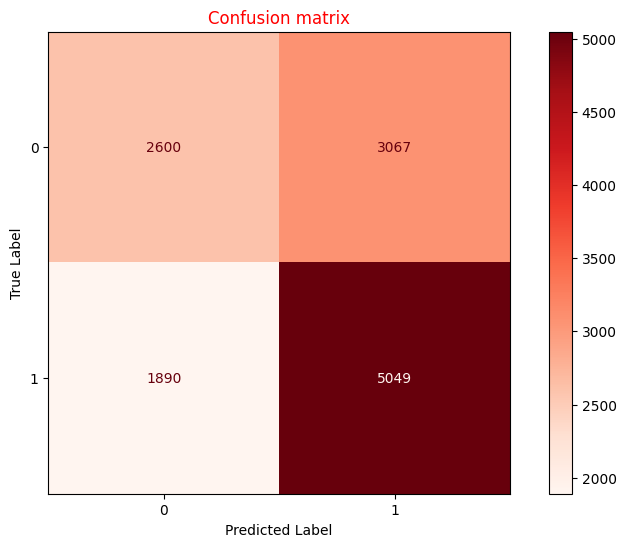

In [7]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

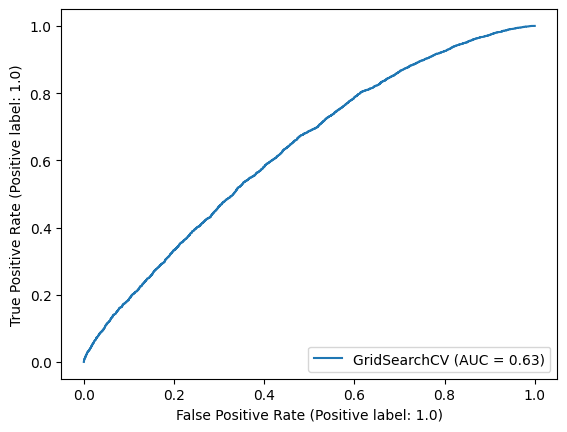

In [8]:
RocCurveDisplay.from_estimator(model, test_data["features"], test_data["labels"]);

## Support Vector Machine

In [13]:
model = load("../models/svm.joblib")
test_data = load("../data/test data/svm_test_data.joblib")

In [14]:
label_predictions = model.predict(test_data["features"])

Classification report

In [15]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

         0.0       0.62      0.37      0.46      5667
         1.0       0.61      0.81      0.70      6939

    accuracy                           0.61     12606
   macro avg       0.61      0.59      0.58     12606
weighted avg       0.61      0.61      0.59     12606



Matthews correlation coeficient

In [16]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.20445300515822878

Confusion matrix

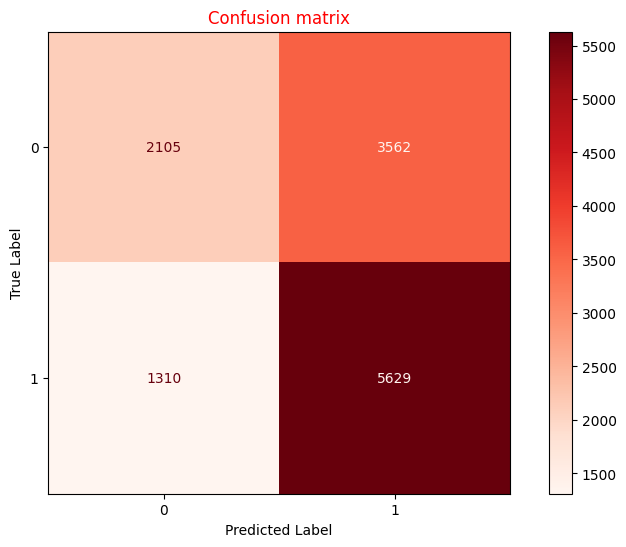

In [17]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

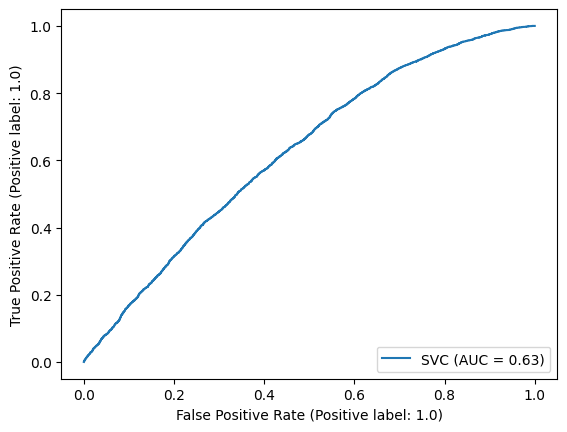

In [18]:
RocCurveDisplay.from_estimator(model, test_data["features"], test_data["labels"]);

## Feedforward Neural Network with ReLu Activation

In [55]:
model = keras.models.load_model("../models/NNRelu")
test_data = load("../data/test data/nnrelu_test_data.joblib")

In [56]:
label_predictions = model.predict(test_data["features"])
label_predictions[label_predictions < 0.5] = 0
label_predictions[label_predictions >= 0.5] = 1

197/197 [==============================] - 0s 1ms/step


Classification report

In [57]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

         0.0       0.47      0.95      0.62      2829
         1.0       0.73      0.11      0.20      3474

    accuracy                           0.49      6303
   macro avg       0.60      0.53      0.41      6303
weighted avg       0.61      0.49      0.39      6303



Matthews correlation coeficient

In [58]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.10851892021554868

Confusion matrix

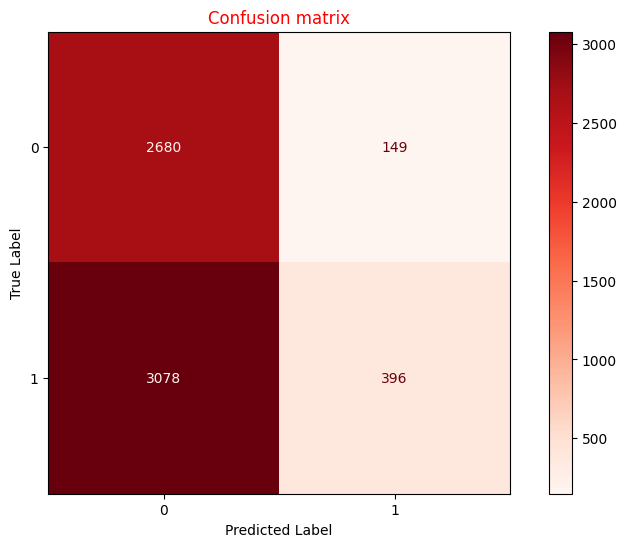

In [59]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

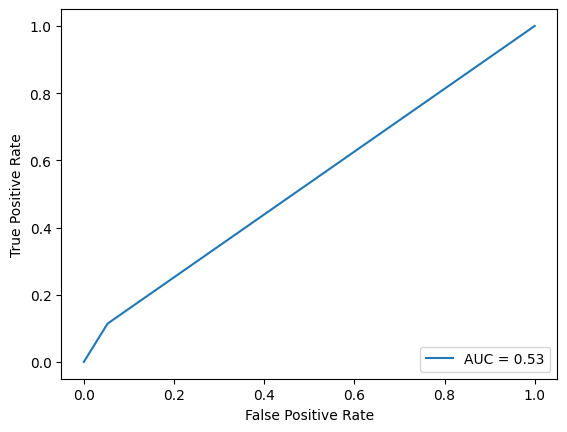

In [60]:
fpr, tpr, tresholds = roc_curve(test_data["labels"], label_predictions)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score(test_data["labels"], label_predictions))
disp.plot();

## Feedforward Neural Network with Sigmoid Activation

In [152]:
model = keras.models.load_model("../models/NNSigmoid")
test_data = load("../data/test data/nnsigmoid_test_data.joblib")

In [153]:
label_predictions = model.predict(test_data["features"])
label_predictions[label_predictions < 0.5] = 0
label_predictions[label_predictions >= 0.5] = 1

197/197 [==============================] - 0s 2ms/step


Classification report

In [154]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

         0.0       0.63      0.31      0.42      2829
         1.0       0.60      0.85      0.71      3474

    accuracy                           0.61      6303
   macro avg       0.62      0.58      0.56      6303
weighted avg       0.62      0.61      0.58      6303



Matthews correlation coeficient

In [155]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.19898709286042915

Confusion matrix

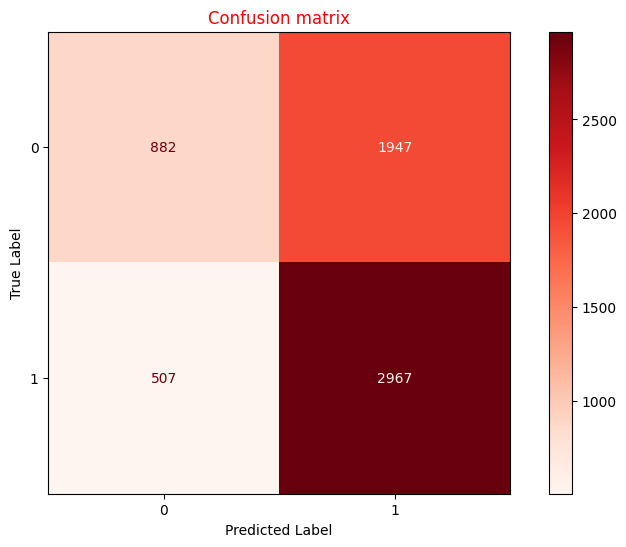

In [156]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

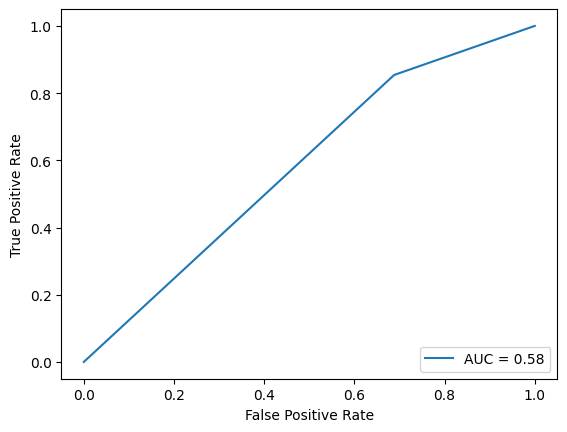

In [157]:
fpr, tpr, tresholds = roc_curve(test_data["labels"], label_predictions)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score(test_data["labels"], label_predictions))
disp.plot();

## Multinomial Naive Bayes

In [37]:
model = load("../models/multinomialnb.joblib")
test_data = load("../data/test data/multinomialnb_test_data.joblib")

In [38]:
label_predictions = model.predict(test_data["features"])

Classification report

In [39]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      5667
         1.0       0.55      1.00      0.71      6939

    accuracy                           0.55     12606
   macro avg       0.28      0.50      0.36     12606
weighted avg       0.30      0.55      0.39     12606



Matthews correlation coeficient

In [40]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.0

Confusion matrix

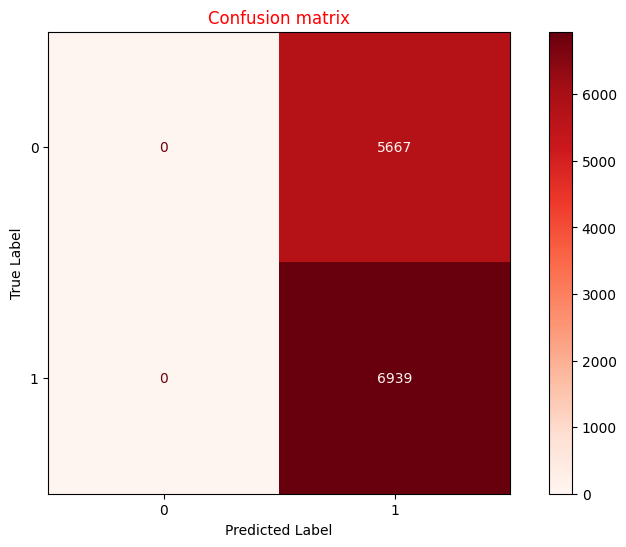

In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

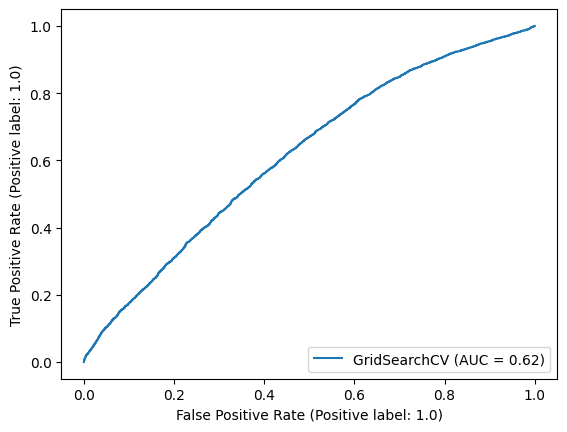

In [42]:
RocCurveDisplay.from_estimator(model, test_data["features"], test_data["labels"]);

## Random Forest

In [2]:
model = load("../models/randomforest.joblib")
test_data = load("../data/test data/randomforest_test_data.joblib")

In [3]:
label_predictions = model.predict(test_data["features"])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


Classification report

In [4]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

           0       0.65      0.32      0.43      5667
           1       0.61      0.86      0.71      6939

    accuracy                           0.62     12606
   macro avg       0.63      0.59      0.57     12606
weighted avg       0.63      0.62      0.58     12606



Matthews correlation coeficient

In [5]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.21368164400054235

Confusion matrix

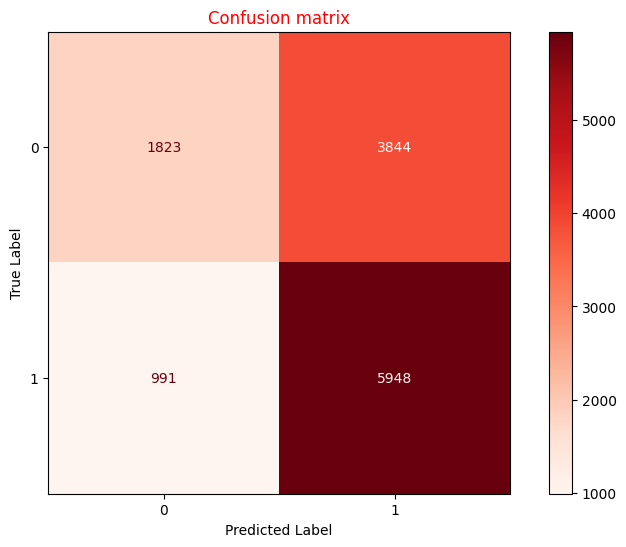

In [6]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


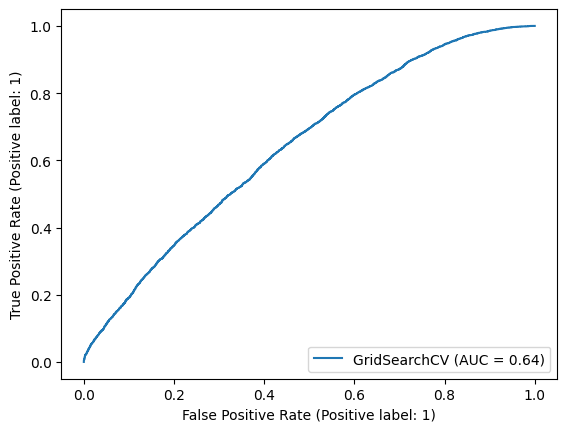

In [7]:
RocCurveDisplay.from_estimator(model, test_data["features"], test_data["labels"]);

Feature importance

<AxesSubplot: xlabel='feature'>

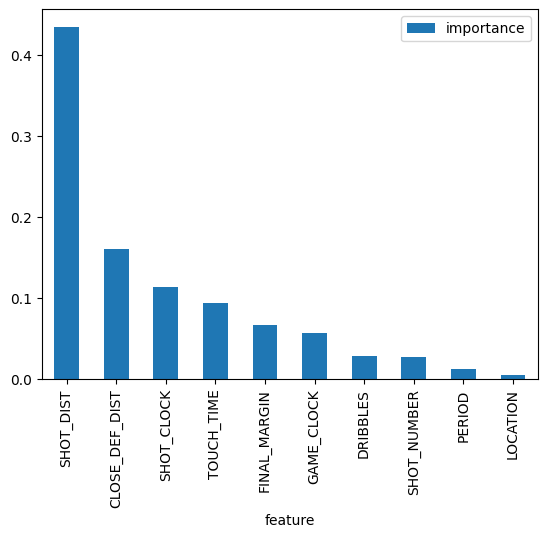

In [11]:
importances = pd.DataFrame({'feature': test_data['features'].columns, 'importance': np.round(model.best_estimator_.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()

## XGBoost

In [164]:
model = load("../models/xgboost.joblib")
test_data = load("../data/test data/xgboost_test_data.joblib")

In [165]:
label_predictions = model.predict(test_data["features"])

Classification report

In [166]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

           0       0.68      0.26      0.38      5667
           1       0.60      0.90      0.72      6939

    accuracy                           0.61     12606
   macro avg       0.64      0.58      0.55     12606
weighted avg       0.63      0.61      0.57     12606



Matthews correlation coeficient

In [167]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.20977757481304676

Confusion matrix

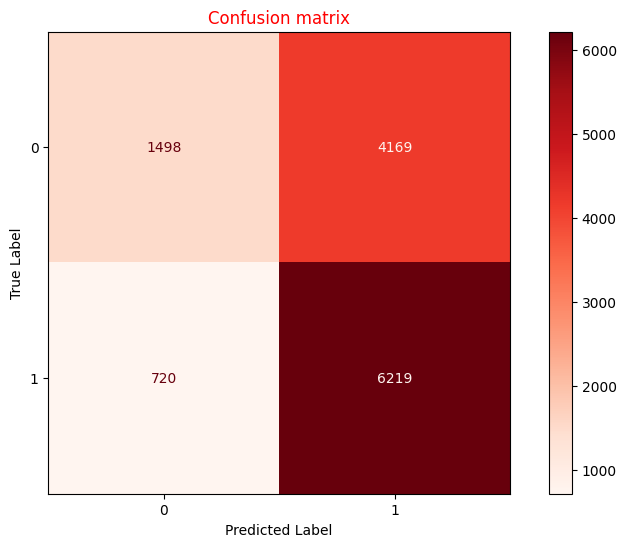

In [168]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

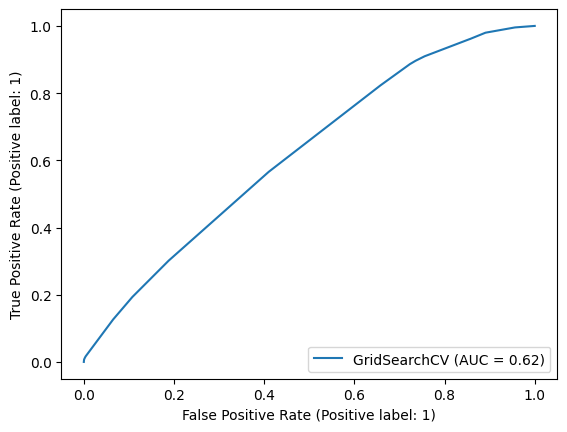

In [170]:
RocCurveDisplay.from_estimator(model, test_data["features"], test_data["labels"]);

## SGD Classifier - Logistic Regression

In [3]:
model = load("../models/sgdlogreg.joblib")
test_data = load("../data/test data/sgdlogreg_test_data.joblib")

In [4]:
label_predictions = model.predict(test_data["features"])

Classification report

In [5]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

         0.0       0.61      0.36      0.45      5667
         1.0       0.61      0.81      0.70      6939

    accuracy                           0.61     12606
   macro avg       0.61      0.59      0.57     12606
weighted avg       0.61      0.61      0.59     12606



Matthews correlation coeficient

In [6]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.19388145441419302

Confusion matrix

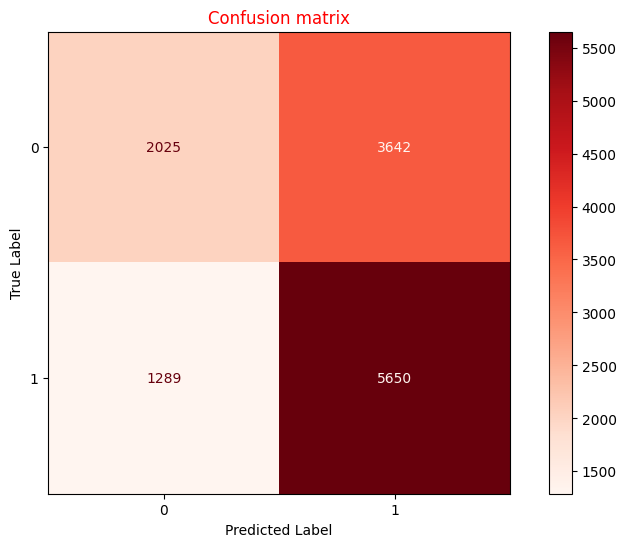

In [7]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

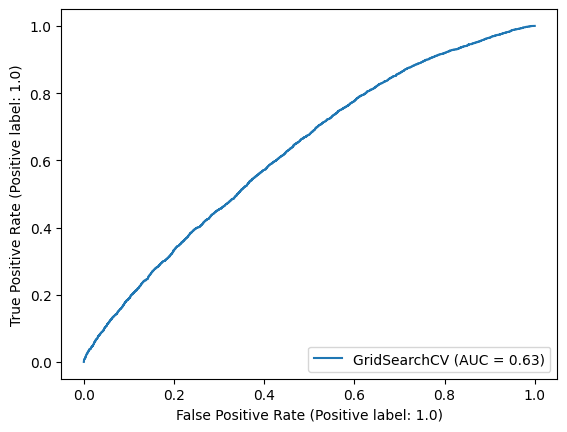

In [8]:
RocCurveDisplay.from_estimator(model, test_data["features"], test_data["labels"]);

## SGD Classifier - Support Vector Machine

In [73]:
model = load("../models/sgdsvm.joblib")
test_data = load("../data/test data/sgdsvm_test_data.joblib")

In [74]:
label_predictions = model.predict(test_data["features"])

Classification report

In [75]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

         0.0       0.56      0.50      0.53      5667
         1.0       0.62      0.67      0.65      6939

    accuracy                           0.60     12606
   macro avg       0.59      0.59      0.59     12606
weighted avg       0.59      0.60      0.59     12606



Matthews correlation coeficient

In [76]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.1764240446260776

Confusion matrix

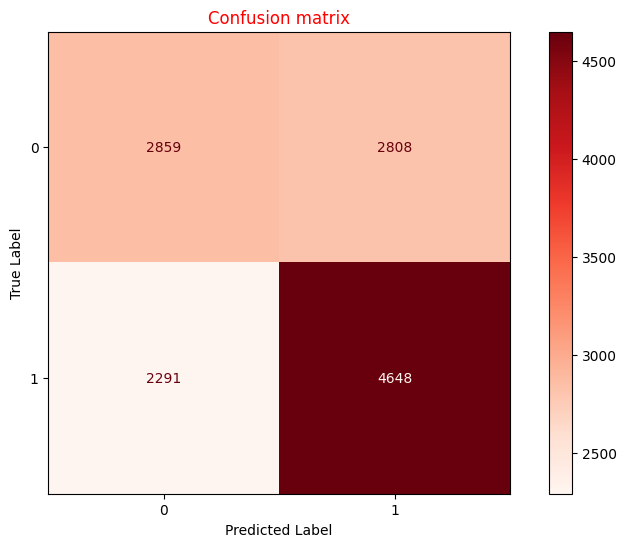

In [77]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

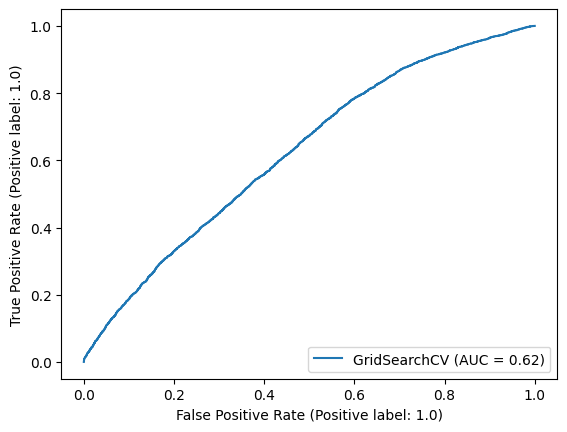

In [78]:
RocCurveDisplay.from_estimator(model, test_data["features"], test_data["labels"]);

## LightGBM

In [21]:
model = load("../models/lightgbm.joblib")
test_data = load("../data/test data/lightgbm_test_data.joblib")

In [22]:
label_predictions = model.predict(test_data["features"])

Classification report

In [23]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5667
           1       0.55      1.00      0.71      6939

    accuracy                           0.55     12606
   macro avg       0.28      0.50      0.36     12606
weighted avg       0.30      0.55      0.39     12606



Matthews correlation coeficient

In [24]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.0

Confusion matrix

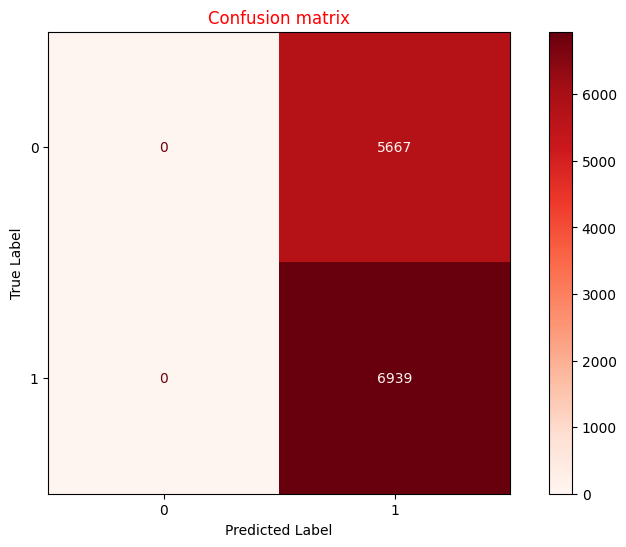

In [25]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

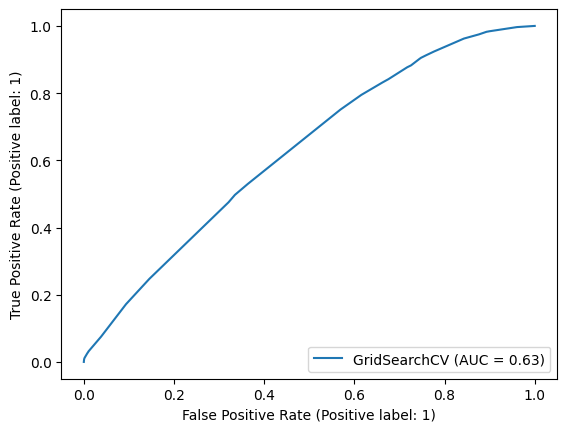

In [26]:
RocCurveDisplay.from_estimator(model, test_data["features"], test_data["labels"]);

## KNN Classifier

In [58]:
model = load("../models/knnclf.joblib")
test_data = load("../data/test data/knnclf_test_data.joblib")

In [59]:
label_predictions = model.predict(test_data["features"])

Classification report

In [61]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

         0.0       0.54      0.43      0.48      5667
         1.0       0.60      0.70      0.65      6939

    accuracy                           0.58     12606
   macro avg       0.57      0.57      0.56     12606
weighted avg       0.57      0.58      0.57     12606



Matthews correlation coeficient

In [62]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.1360350258978777

Confusion matrix

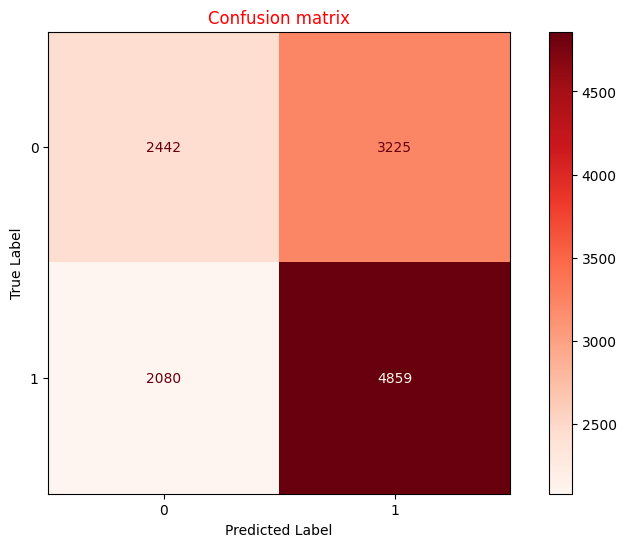

In [63]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

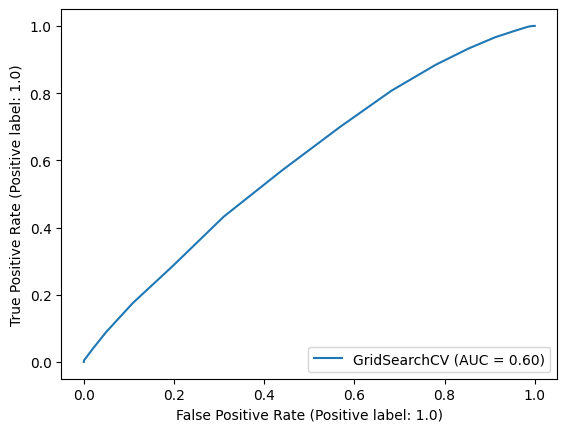

In [64]:
RocCurveDisplay.from_estimator(model, test_data["features"], test_data["labels"]);

## AdaBoost Classifier

In [158]:
model = load("../models/adaboost.joblib")
test_data = load("../data/test data/adaboost_test_data.joblib")

In [159]:
label_predictions = model.predict(test_data["features"])

Classification report

In [160]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

           0       0.61      0.34      0.44      5667
           1       0.61      0.82      0.70      6939

    accuracy                           0.61     12606
   macro avg       0.61      0.58      0.57     12606
weighted avg       0.61      0.61      0.58     12606



Matthews correlation coeficient

In [162]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.1894568040989553

Confusion matrix

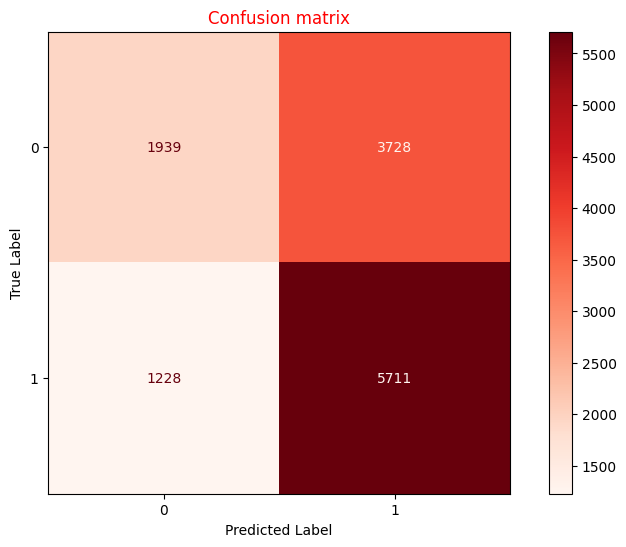

In [161]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

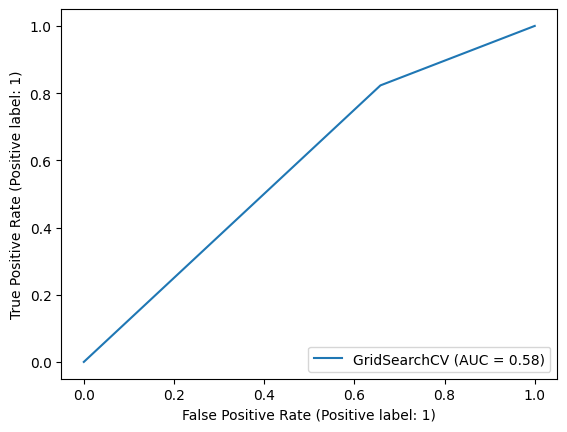

In [163]:
RocCurveDisplay.from_estimator(model, test_data["features"], test_data["labels"]);

## Voting Classifier (Soft)
Estimators: Random Forest, XGBoost, Logistic Regression

In [50]:
model = load("../models/votingclf_soft.joblib")
test_data = load("../data/test data/votingclf_test_data.joblib")

In [51]:
label_predictions = model.predict(test_data["features"])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.5s finished


Classification report

In [52]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

         0.0       0.61      0.38      0.47      5667
         1.0       0.61      0.80      0.70      6939

    accuracy                           0.61     12606
   macro avg       0.61      0.59      0.58     12606
weighted avg       0.61      0.61      0.60     12606



Matthews correlation coeficient

In [56]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.20691206467690423

Confusion matrix

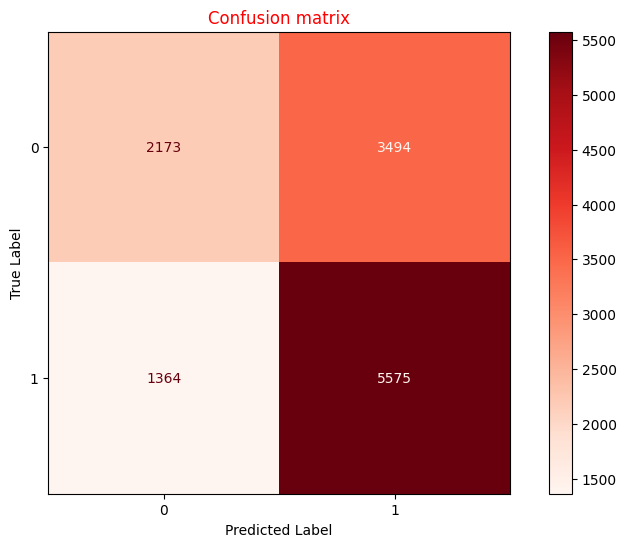

In [57]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)

ROC Curve

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.6s finished


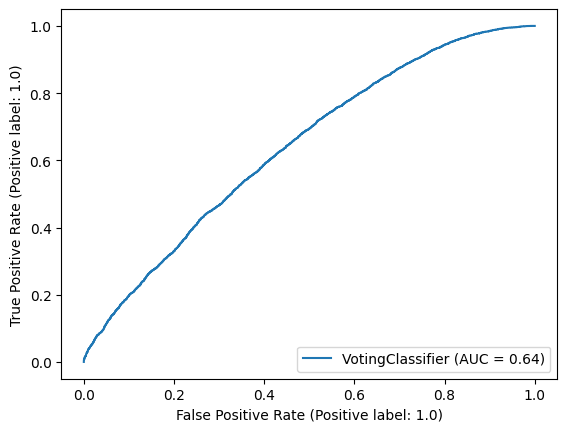

In [58]:
RocCurveDisplay.from_estimator(model, test_data["features"], test_data["labels"]);

## Voting Classifier (Hard)
Estimators: Random Forest, XGBoost, Logistic Regression

In [12]:
model = load("../models/votingclf_hard.joblib")
test_data = load("../data/test data/votingclf_test_data.joblib")

In [13]:
label_predictions = model.predict(test_data["features"])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.5s finished


Classification report

In [14]:
print(classification_report(test_data["labels"], label_predictions))

              precision    recall  f1-score   support

         0.0       0.65      0.32      0.43      5667
         1.0       0.61      0.85      0.71      6939

    accuracy                           0.62     12606
   macro avg       0.63      0.59      0.57     12606
weighted avg       0.62      0.62      0.58     12606



Matthews correlation coeficient

In [62]:
matthews_corrcoef(test_data["labels"], label_predictions)

0.2121273130806794

Confusion matrix

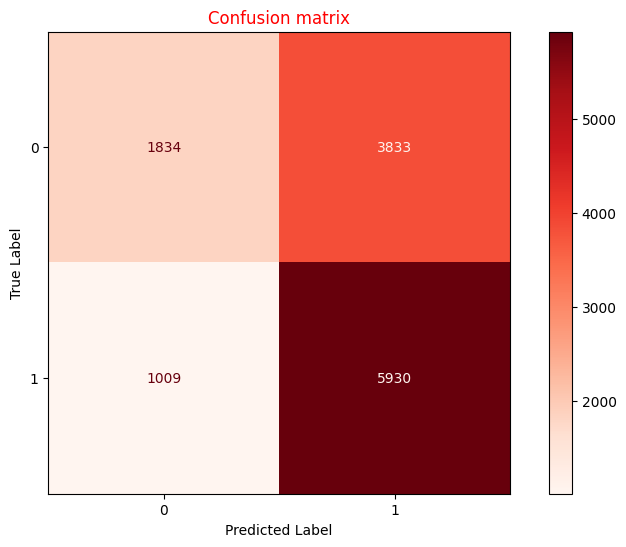

In [15]:
disp = ConfusionMatrixDisplay(confusion_matrix(test_data["labels"], label_predictions))
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion matrix", color="red")
plt.xlabel('Predicted Label',color='black')
plt.ylabel('True Label',color='black')
plt.gcf().axes[0].tick_params(color="black")
plt.gcf().axes[1].tick_params(color="black")
plt.gcf().set_size_inches(10,6)